In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
print(f"{'column':<10}{'count':<10}{'nunique':<10}{'null':<10}")
for col in df:
    print(
        f"{col:<10}{df[col].count():<10}{df[col].nunique():<10}{df[col].isna().sum():<10}"
    )

column    count     nunique   null      
age       1338      47        0         
sex       1338      2         0         
bmi       1338      548       0         
children  1338      6         0         
smoker    1338      2         0         
region    1338      4         0         
charges   1338      1337      0         


In [6]:
def univariate(df):
    header = f"{'column':<10}{'count':<10}{'min':<10}{'max':<10}{'q%25':<10}{'q%50':<10}{'q%75':<10}{'mean':<10}{'median':<10}{'mode':<10}{'std':<10}{'skew':<10}{'kurtosis':<10}"
    print(header)

    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            mode_value = df[col].mode().iloc[0]
            values = (
                f"{col:<10}"
                f"{df[col].count():<10}"
                f"{df[col].min():<10.1f}"
                f"{df[col].max():<10.1f}"
                f"{df[col].quantile(0.25):<10.1f}"
                f"{df[col].quantile(0.50):<10.1f}"
                f"{df[col].quantile(0.75):<10.1f}"
                f"{df[col].mean():<10.1f}"
                f"{df[col].median():<10.1f}"
                f"{mode_value:<10.1f}"
                f"{df[col].std():<10.1f}"
                f"{df[col].skew():<10.1f}"
                f"{df[col].kurtosis():<10.1f}"
            )
            print(values)

In [7]:
def plot_hist(df):
    import math

    numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
    num_plots = len(numerical_cols)
    num_rows = math.ceil(math.sqrt(num_plots))
    num_cols = math.ceil(num_plots / num_rows)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, ax=axes[i], kde=True)

    plt.tight_layout()

In [8]:
univariate(df)

column    count     min       max       q%25      q%50      q%75      mean      median    mode      std       skew      kurtosis  
age       1338      18.0      64.0      27.0      39.0      51.0      39.2      39.0      18.0      14.0      0.1       -1.2      
bmi       1338      16.0      53.1      26.3      30.4      34.7      30.7      30.4      32.3      6.1       0.3       -0.1      
children  1338      0.0       5.0       0.0       1.0       2.0       1.1       1.0       0.0       1.2       0.9       0.2       
charges   1338      1121.9    63770.4   4740.3    9382.0    16639.9   13270.4   9382.0    1639.6    12110.0   1.5       1.6       


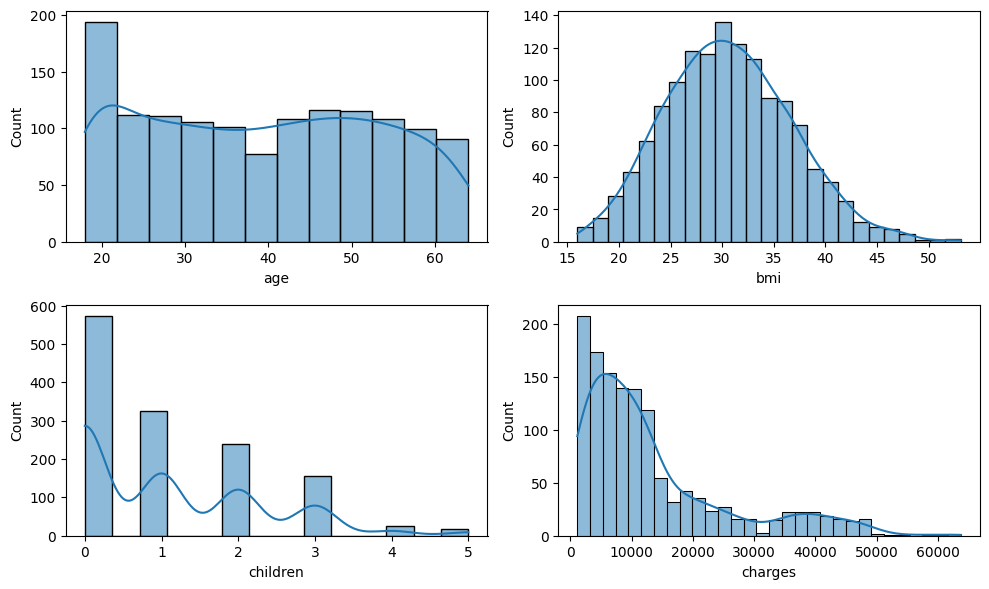

In [9]:
plot_hist(df)

In [10]:
def correlation_with_target(df, target_variable):
    from scipy import stats
    corr_df = pd.DataFrame(columns=["r", "p-value"])

    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            r, p = stats.pearsonr(df[target_variable], df[col])
            corr_df.loc[col] = [round(r, 3), round(p, 3)]
        corr_df.sort_values(by=["r"], ascending=False)

    return corr_df

In [11]:
target_variable = "charges"
correlation_with_target(df, target_variable)


,r,p-value
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013
charges,1.000,0.000


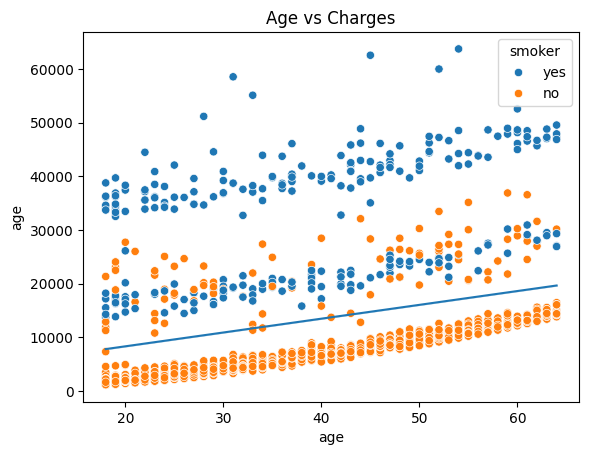

In [36]:
from scipy import stats
slope, intercept, rvalue, pvalue, err = stats.linregress(df['age'], df['charges'])

y = intercept + slope * df['age']

sns.lineplot(x=df['age'], y=y)

sns.scatterplot(data=df, x='age',  y='charges', hue='smoker')
plt.title('Age vs Charges')
plt.show()

In [39]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='charges~age', data=df).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

,LM stat,LM p-value,F-stat,F p-value
White,0.003,0.999,0.001,0.999
Breusch-Pagan,0.000,0.984,0.000,0.984


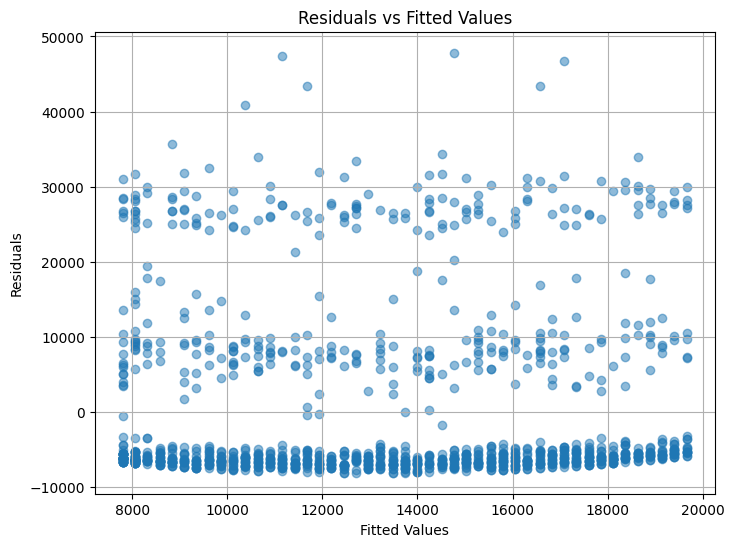

In [40]:

residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
